In [1]:
knitr::opts_chunk$set(echo = TRUE)

In [2]:
install.packages("feather")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## load libraries

In [3]:
library(tidyverse)
library(feather)
library(ggplot2)
library(reticulate)

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## read in data

In [4]:
setwd("/home/ec2-user/SageMaker/coles")

test              <- read_csv("data/test.csv")
transactions      <- read_csv("data/transactions.csv")
stores            <- read_csv("data/stores.csv")
sample_submission <- read_csv("data/sample_submission.csv")
oil               <- read_csv("data/oil.csv")
holiday_events    <- read_csv("data/holidays_events.csv")
items             <- read_csv("data/items.csv")

Rows: 3370464 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (3): id, store_nbr, item_nbr
lgl  (1): onpromotion
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 83488 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): store_nbr, transactions
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 54 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): city, state, type
dbl (2): store_nbr, cluster


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this messa

In [5]:
#train <- read_csv("data/train.csv")
#write_feather(train, "data/train.feather")
train <- read_feather("data/train.feather")

## quick look at the data - to understand problem and domain

In [6]:
print("oil")
glimpse(oil)
print("holiday_events")
glimpse(holiday_events)
print("items")
glimpse(items)

[1] "oil"
Rows: 1,218
Columns: 2
$ date       <date> 2013-01-01, 2013-01-02, 2013-01-03, 2013-01-04, 2013-01-07…
$ dcoilwtico <dbl> NA, 93.14, 92.97, 93.12, 93.20, 93.21, 93.08, 93.81, 93.60,…
[1] "holiday_events"
Rows: 350
Columns: 6
$ date        <date> 2012-03-02, 2012-04-01, 2012-04-12, 2012-04-14, 2012-04-2…
$ type        <chr> "Holiday", "Holiday", "Holiday", "Holiday", "Holiday", "Ho…
$ locale      <chr> "Local", "Regional", "Local", "Local", "Local", "Local", "…
$ locale_name <chr> "Manta", "Cotopaxi", "Cuenca", "Libertad", "Riobamba", "Pu…
$ description <chr> "Fundacion de Manta", "Provincializacion de Cotopaxi", "Fu…
$ transferred <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
[1] "items"
Rows: 4,100
Columns: 4
$ item_nbr   <dbl> 96995, 99197, 103501, 103520, 103665, 105574, 105575, 10557…
$ family     <chr> "GROCERY I", "GROCERY I", "CLEANING", "GROCERY I", "BREAD/B…
$ class      <dbl> 1093, 1067, 3008, 1028, 2712, 1045, 1045, 1045, 1045, 1034,…
$ perishab

## oil

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


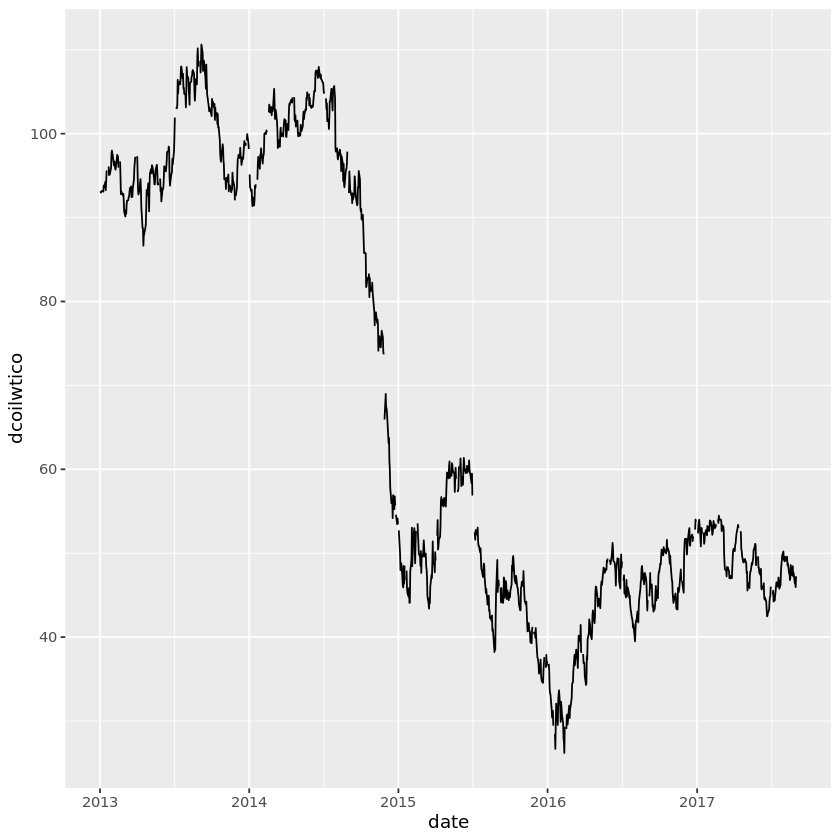

In [7]:
ggplot(oil) + geom_line(aes(x=date, y=dcoilwtico))

# holidays

In [8]:
head(holiday_events)
table(holiday_events$locale_name)
hols <- holiday_events %>% filter(locale_name == "Ecuador")

date       type    locale   locale_name description                  
1 2012-03-02 Holiday Local    Manta       Fundacion de Manta           
2 2012-04-01 Holiday Regional Cotopaxi    Provincializacion de Cotopaxi
3 2012-04-12 Holiday Local    Cuenca      Fundacion de Cuenca          
4 2012-04-14 Holiday Local    Libertad    Cantonizacion de Libertad    
5 2012-04-21 Holiday Local    Riobamba    Cantonizacion de Riobamba    
6 2012-05-12 Holiday Local    Puyo        Cantonizacion del Puyo       
  transferred
1 FALSE      
2 FALSE      
3 FALSE      
4 FALSE      
5 FALSE      
6 FALSE


                        Ambato                        Cayambe 
                            12                              6 
                      Cotopaxi                         Cuenca 
                             6                              7 
                       Ecuador                      El Carmen 
                           174                              6 
                    Esmeraldas                       Guaranda 
                             6                             12 
                     Guayaquil                         Ibarra 
                            11                              7 
                      Imbabura                      Latacunga 
                             6                             12 
                      Libertad                           Loja 
                             6                              6 
                       Machala                          Manta 
                             6                        

In [9]:
hols %>% filter(date < as.Date('2013-01-01', "%Y-%m-%d"))

date       type       locale   locale_name
1  2012-08-10 Holiday    National Ecuador    
2  2012-10-09 Holiday    National Ecuador    
3  2012-10-12 Transfer   National Ecuador    
4  2012-11-02 Holiday    National Ecuador    
5  2012-11-03 Holiday    National Ecuador    
6  2012-12-21 Additional National Ecuador    
7  2012-12-22 Additional National Ecuador    
8  2012-12-23 Additional National Ecuador    
9  2012-12-24 Bridge     National Ecuador    
10 2012-12-24 Additional National Ecuador    
11 2012-12-25 Holiday    National Ecuador    
12 2012-12-26 Additional National Ecuador    
13 2012-12-31 Bridge     National Ecuador    
14 2012-12-31 Additional National Ecuador    
   description                         transferred
1  Primer Grito de Independencia       FALSE      
2  Independencia de Guayaquil           TRUE      
3  Traslado Independencia de Guayaquil FALSE      
4  Dia de Difuntos                     FALSE      
5  Independencia de Cuenca             FALSE      
6  Navidad-4                           FALSE      
7  Navidad-3                           FALSE      
8  Navidad-2                           FALSE      
9  Puente Navidad                      FALSE      
10 Navidad-1                           FALSE      
11 Navidad                             FALSE      
12 Navidad+1                           FALSE      
13 Puente Primer dia del ano           FALSE      
14 Primer dia del ano-1                FALSE

In [10]:
hols %>% filter(!transferred & date < as.Date('2013-01-01', "%Y-%m-%d"))

date       type       locale   locale_name
1  2012-08-10 Holiday    National Ecuador    
2  2012-10-12 Transfer   National Ecuador    
3  2012-11-02 Holiday    National Ecuador    
4  2012-11-03 Holiday    National Ecuador    
5  2012-12-21 Additional National Ecuador    
6  2012-12-22 Additional National Ecuador    
7  2012-12-23 Additional National Ecuador    
8  2012-12-24 Bridge     National Ecuador    
9  2012-12-24 Additional National Ecuador    
10 2012-12-25 Holiday    National Ecuador    
11 2012-12-26 Additional National Ecuador    
12 2012-12-31 Bridge     National Ecuador    
13 2012-12-31 Additional National Ecuador    
   description                         transferred
1  Primer Grito de Independencia       FALSE      
2  Traslado Independencia de Guayaquil FALSE      
3  Dia de Difuntos                     FALSE      
4  Independencia de Cuenca             FALSE      
5  Navidad-4                           FALSE      
6  Navidad-3                           FALSE      
7  Navidad-2                           FALSE      
8  Puente Navidad                      FALSE      
9  Navidad-1                           FALSE      
10 Navidad                             FALSE      
11 Navidad+1                           FALSE      
12 Puente Primer dia del ano           FALSE      
13 Primer dia del ano-1                FALSE

In [11]:
table(hols$type)
# work day is a negative - a usual weekend that becomes a work day, offsetting the bridge


Additional     Bridge      Event    Holiday   Transfer   Work Day 
        40          5         56         60          8          5 

- NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer.

- For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12.

- Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
### Additional Notes

- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

# items

In [12]:
items %>% head()
print(paste("no of items:", nrow(items)))

item_nbr family       class perishable
1  96995   GROCERY I    1093  0         
2  99197   GROCERY I    1067  0         
3 103501   CLEANING     3008  0         
4 103520   GROCERY I    1028  0         
5 103665   BREAD/BAKERY 2712  1         
6 105574   GROCERY I    1045  0

[1] "no of items: 4100"


In [13]:
table(items$family) %>% data.frame() %>% arrange(-Freq)

Var1                       Freq
1  GROCERY I                  1334
2  BEVERAGES                   613
3  CLEANING                    446
4  PRODUCE                     306
5  DAIRY                       242
6  PERSONAL CARE               153
7  BREAD/BAKERY                134
8  HOME CARE                   108
9  DELI                         91
10 MEATS                        84
11 HOME AND KITCHEN I           77
12 LIQUOR,WINE,BEER             73
13 FROZEN FOODS                 55
14 POULTRY                      54
15 HOME AND KITCHEN II          45
16 EGGS                         41
17 CELEBRATION                  31
18 LAWN AND GARDEN              26
19 PREPARED FOODS               26
20 LADIESWEAR                   21
21 AUTOMOTIVE                   20
22 LINGERIE                     20
23 BEAUTY                       19
24 PLAYERS AND ELECTRONICS      17
25 SCHOOL AND OFFICE SUPPLIES   15
26 GROCERY II                   14
27 PET SUPPLIES                 14
28 SEAFOOD                       8
29 MAGAZINES                     6
30 HARDWARE                      4
31 BABY CARE                     1
32 BOOKS                         1
33 HOME APPLIANCES               1

In [14]:
items %>% filter(family %in% c("GROCERY I", "GROCERY II", "EGGS")) %>% count() %>% pull()

[1] 1389

In [15]:
table(items$class)
table(items$perishable)


1002 1003 1004 1005 1006 1008 1010 1012 1013 1014 1016 1018 1022 1024 1025 1026 
  31    4   39    1   12   12   22   10    2   26  133    1    9    4    2   54 
1027 1028 1029 1030 1032 1033 1034 1035 1036 1038 1039 1040 1041 1042 1044 1045 
   2   48    1   51   65    3   98    6   27    4    8  110    1   51   30   24 
1046 1048 1050 1052 1054 1056 1058 1060 1062 1063 1064 1066 1067 1068 1070 1072 
   1   20    8   11    2    9   16   19   30    7    2    5    2   22    4   70 
1073 1074 1075 1076 1077 1078 1079 1080 1082 1083 1084 1086 1087 1088 1089 1092 
   2   39    2   23    3   12    1   10    7    1   20   17    3   17    1   19 
1093 1094 1096 1114 1115 1116 1118 1120 1122 1124 1126 1132 1136 1138 1142 1144 
   5   15   18   42    2   18   26   61   81  100   36   21   27    9   37   35 
1146 1148 1150 1152 1153 1154 1156 1190 1236 1302 1306 1310 1312 1314 1316 1318 
   7   62    1    4    1    2    1   40   14    2    1    4    2    2    1   32 
1320 1326 1328 1330 1334 13


   0    1 
3114  986 

In [16]:
items %>% filter(family %in% c("GROCERY I", "GROCERY II", "EGGS")) %>% select(perishable) %>% table()

.
   0    1 
1348   41 

In [17]:
table(items$family, items$perishable)

                            
                                0    1
  AUTOMOTIVE                   20    0
  BABY CARE                     1    0
  BEAUTY                       19    0
  BEVERAGES                   613    0
  BOOKS                         1    0
  BREAD/BAKERY                  0  134
  CELEBRATION                  31    0
  CLEANING                    446    0
  DAIRY                         0  242
  DELI                          0   91
  EGGS                          0   41
  FROZEN FOODS                 55    0
  GROCERY I                  1334    0
  GROCERY II                   14    0
  HARDWARE                      4    0
  HOME AND KITCHEN I           77    0
  HOME AND KITCHEN II          45    0
  HOME APPLIANCES               1    0
  HOME CARE                   108    0
  LADIESWEAR                   21    0
  LAWN AND GARDEN              26    0
  LINGERIE                     20    0
  LIQUOR,WINE,BEER             73    0
  MAGAZINES                     6  

In [18]:
head(train)

id date       store_nbr item_nbr unit_sales onpromotion
1 0  2013-01-01 25        103665   7          NA         
2 1  2013-01-01 25        105574   1          NA         
3 2  2013-01-01 25        105575   2          NA         
4 3  2013-01-01 25        108079   1          NA         
5 4  2013-01-01 25        108701   1          NA         
6 5  2013-01-01 25        108786   3          NA

In [19]:
head(test)

id        date       store_nbr item_nbr onpromotion
1 125497040 2017-08-16 1          96995   FALSE      
2 125497041 2017-08-16 1          99197   FALSE      
3 125497042 2017-08-16 1         103501   FALSE      
4 125497043 2017-08-16 1         103520   FALSE      
5 125497044 2017-08-16 1         103665   FALSE      
6 125497045 2017-08-16 1         105574   FALSE

In [20]:
head(sample_submission)

id        unit_sales
1 125497040 0         
2 125497041 0         
3 125497042 0         
4 125497043 0         
5 125497044 0         
6 125497045 0

In [39]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

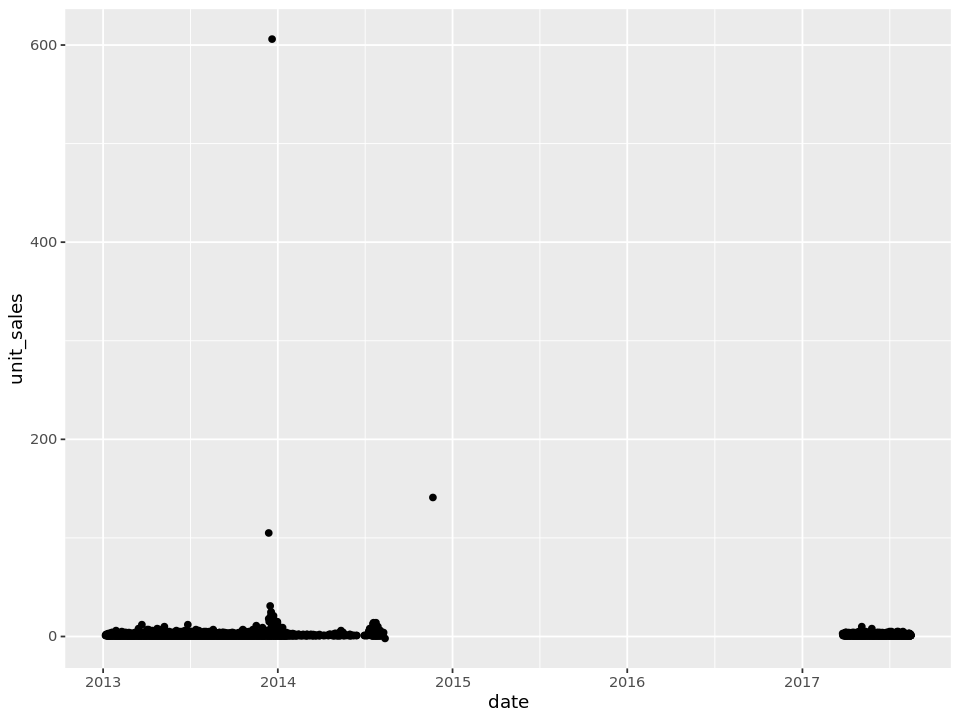

In [42]:
# item time series - store
fig(8,6)
train %>% filter(item_nbr == 96995) %>% 
  ggplot(.) + geom_point(aes(x=date, y=unit_sales))

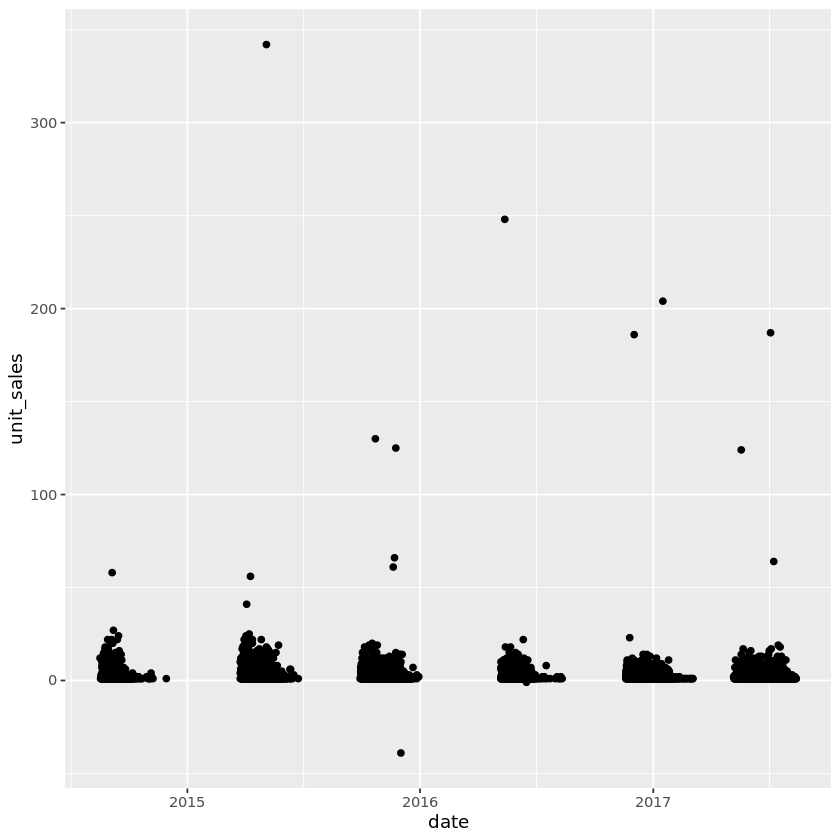

In [22]:
# item time series - store
train %>% filter(item_nbr == 99197) %>% 
  ggplot(.) + geom_point(aes(x=date, y=unit_sales)) 

In [23]:
library(lubridate)
train$year <- year(train$date)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




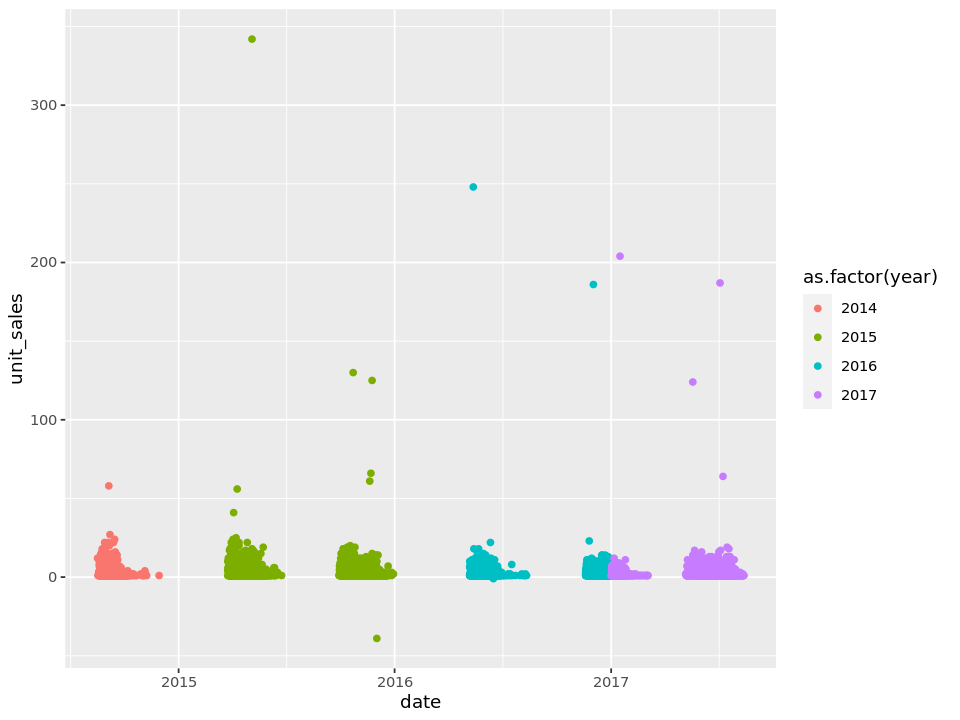

In [43]:
fig(8,6)
train %>% filter(item_nbr == 99197) %>% 
  ggplot(.) + geom_point(aes(x=date, y=unit_sales, colour=as.factor(year))) 

In [25]:
items %>% filter(item_nbr == 99197)

item_nbr family    class perishable
1 99197    GROCERY I 1067  0

In [26]:
length(unique(train$item_nbr))

[1] 4036

In [28]:
itemlist <- sample(unique(train$item_nbr), 10)

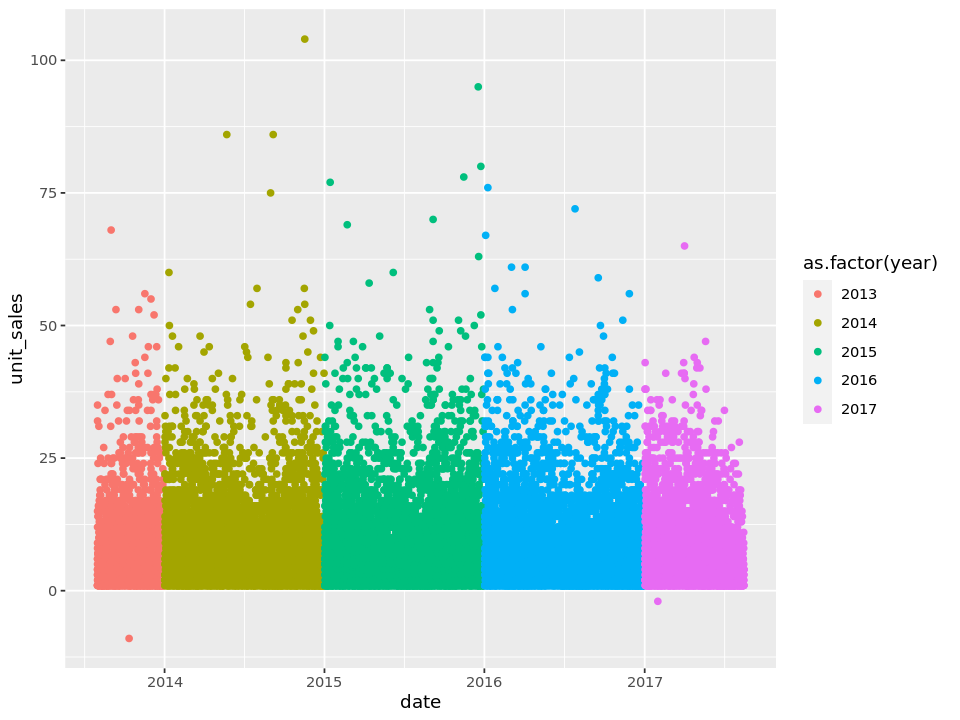

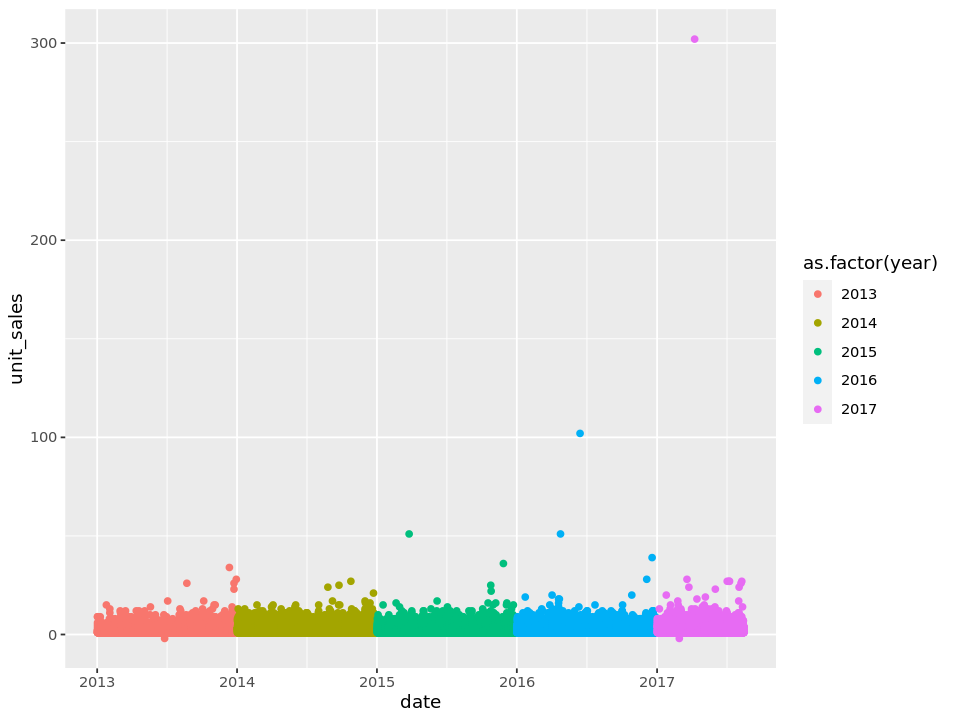

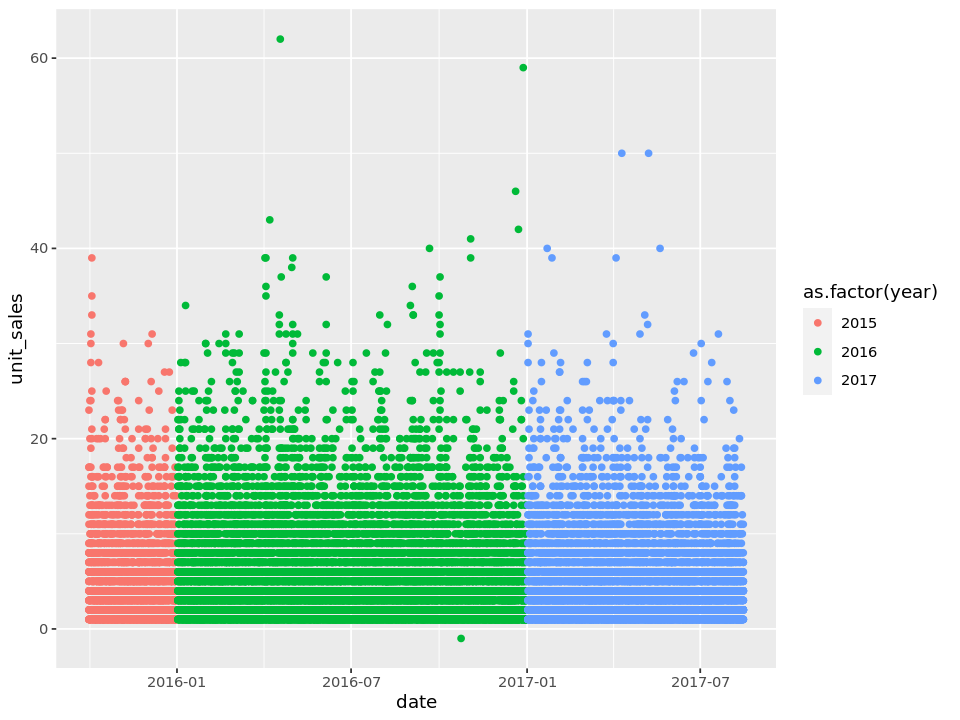

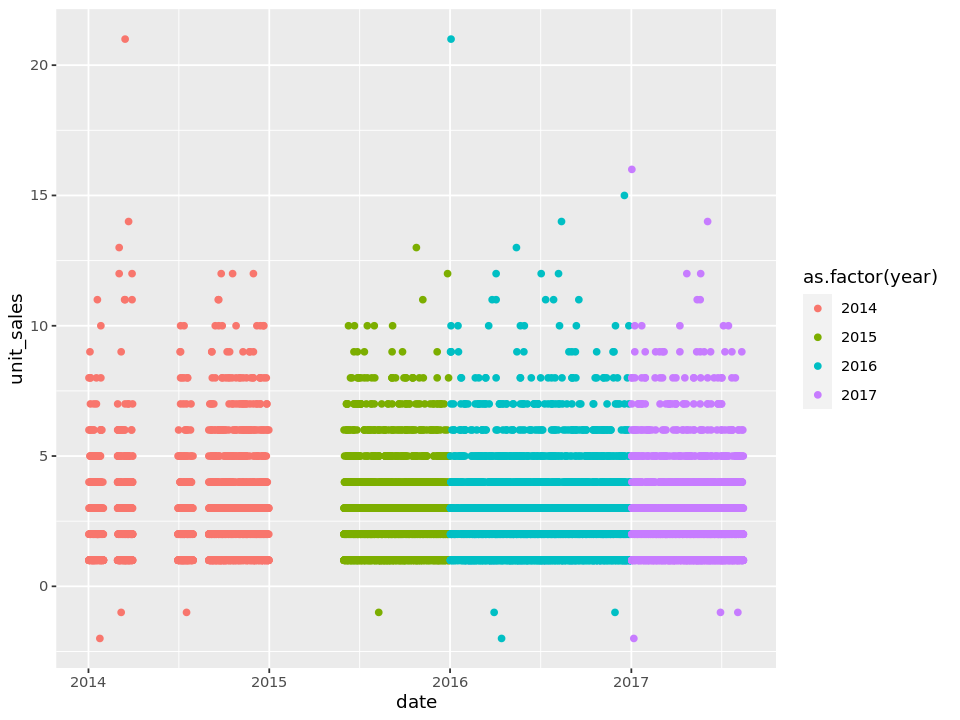

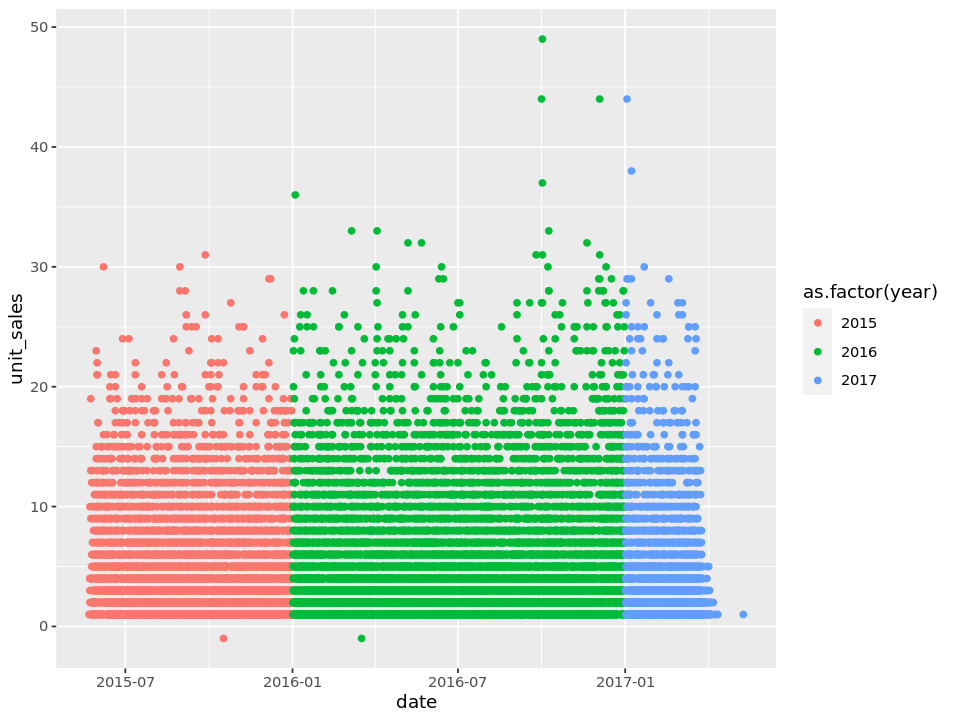

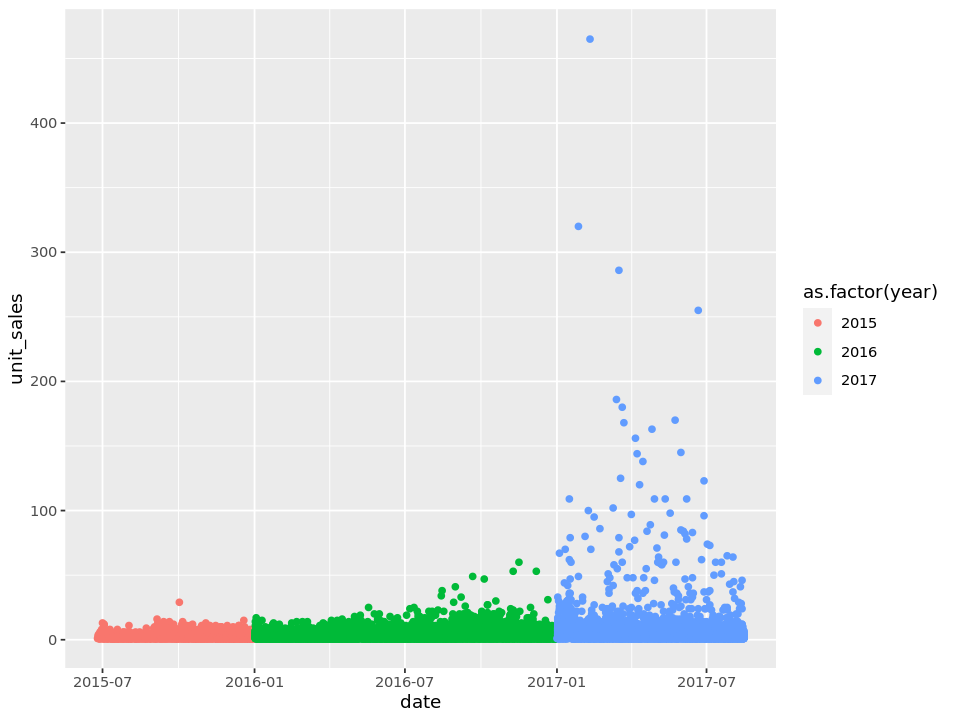

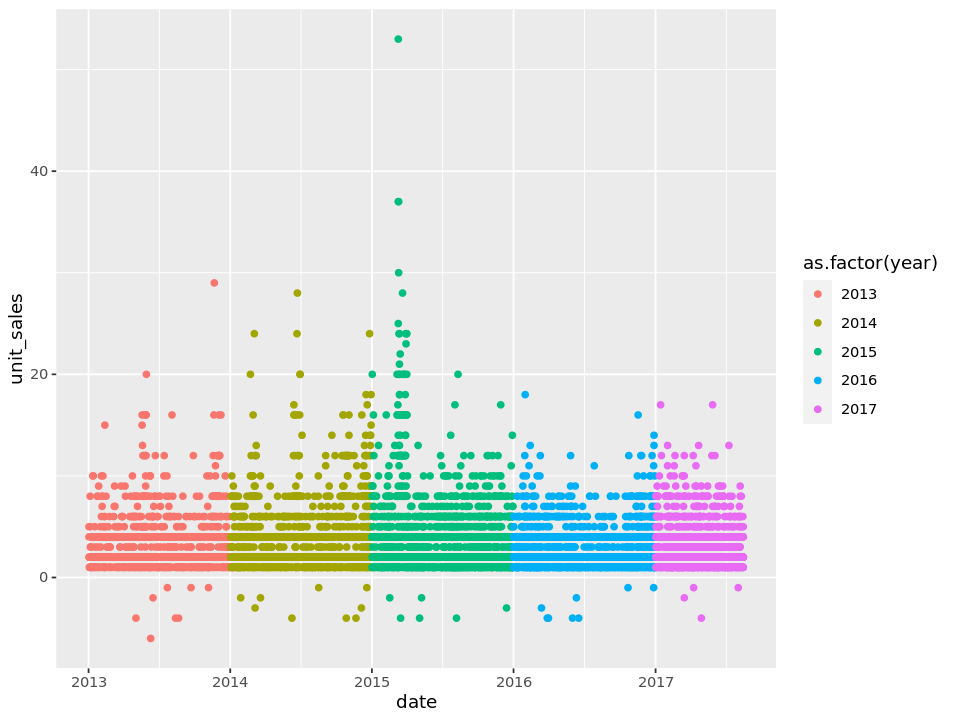

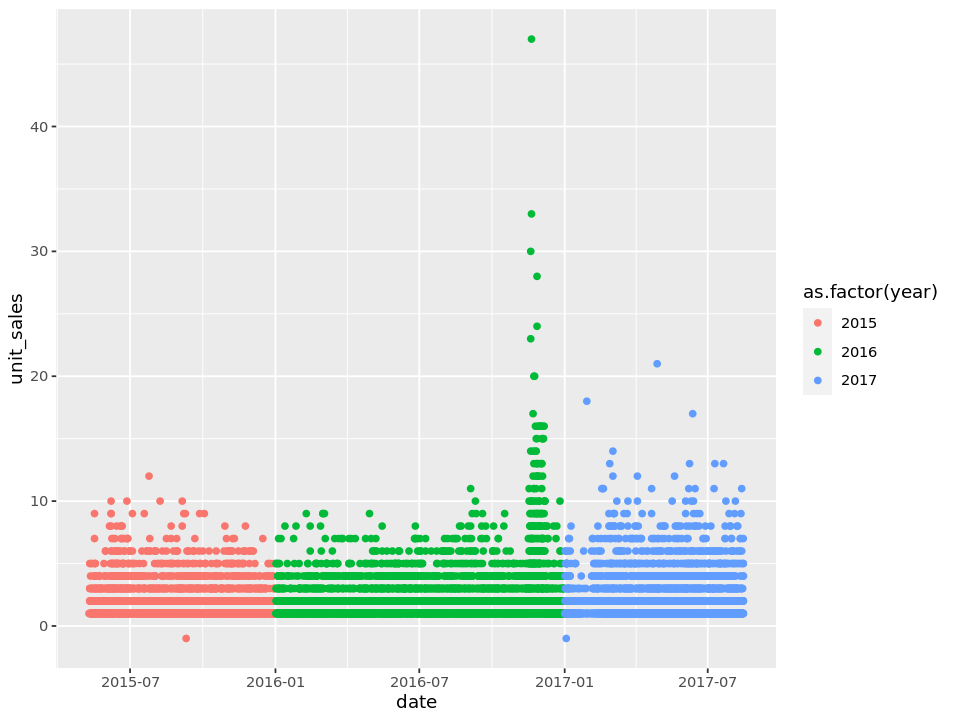

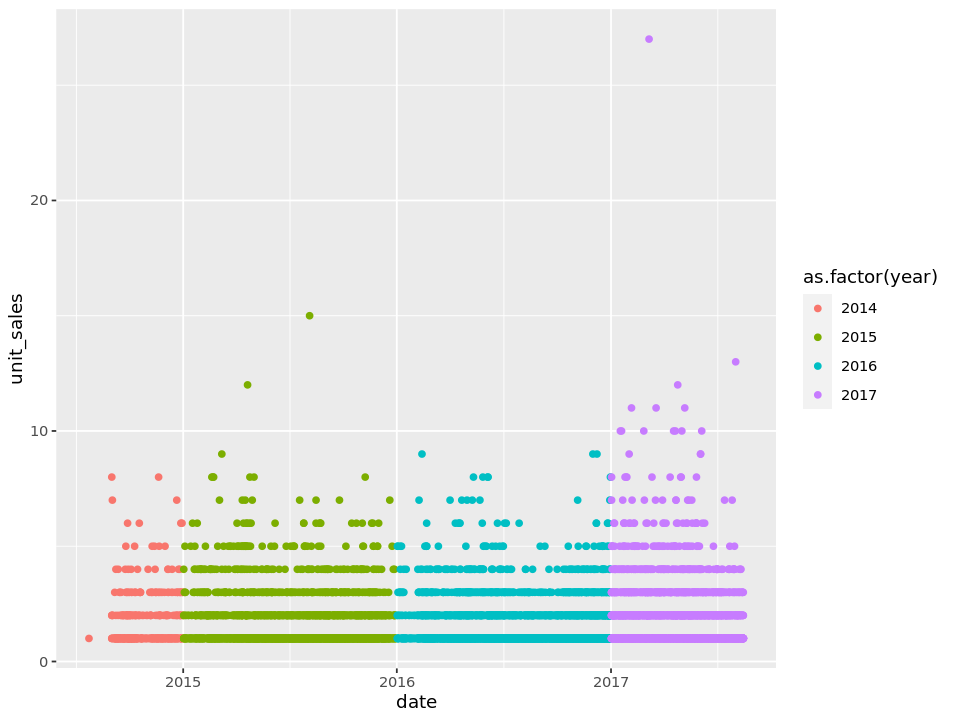

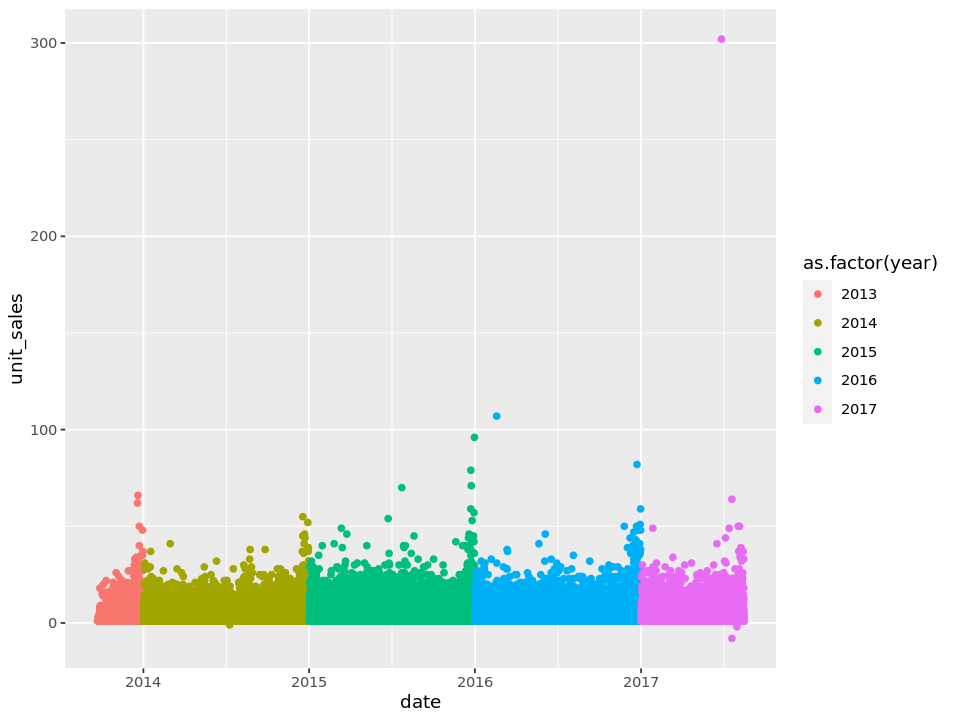

In [44]:
fig(8,6)
for (i in 1:length(itemlist)) {
  df <- train %>% filter(item_nbr == itemlist[i])
  p1 <- ggplot(df) + geom_point(aes(x=date, y=unit_sales, colour=as.factor(year))) 
  print(p1)
}

# notes
- realise this challenge is more difficult than anticipated, i.e. item sales by store is more difficult than store sales/transactions
- due to sparsity of data, estimating strictly on item will result in poor performance
- research indicates that clustering or some of hierarchical modelling (product and geography) will perform better. source: https://stats.stackexchange.com/questions/344705/product-demand-forecasting-for-thousands-of-products-across-multiple-stores
- this is in line with my initial thought of running deepAR

- saw some blog posts indicating that deepAR placed 2nd and that LSTM actually performed well in another kaggle item-store forecast competition
- expect that some weighting of separate models would do well